In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv('df_clean.csv')
df.head()

,lipase_level,gender,actual_age,is_confirmed_ap,charlson_comorbidity_index,aniongap_chemistry,bicarbonate_chemistry,bun_chemistry,calcium_chemistry,chloride_chemistry,...,sodium_chemistry,potassium_chemistry,bilirubin_total_enzyme,amylase_enzyme,alt_enzyme,alp_enzyme,ast_enzyme,creatinine_albumin_ratio,wbc,severity
0,1222.0,0,64,1,4,20.0,28.0,11.0,9.6,110.0,...,143.0,4.5,1.7,302.0,523.0,252.0,333.0,0.250000,14.1,4
1,508.0,0,67,1,3,17.0,27.0,9.0,9.6,98.0,...,139.0,4.6,0.6,177.0,14.0,138.0,14.0,0.151515,12.9,3
2,1164.0,1,64,1,4,22.0,37.0,51.0,8.4,115.0,...,148.0,5.7,1.1,43.0,85.0,94.0,55.0,0.435897,33.0,0
3,677.0,1,58,1,2,27.0,29.0,82.0,9.6,112.0,...,150.0,5.8,5.6,231.0,257.0,719.0,303.0,2.000000,48.3,0
4,692.0,1,32,1,0,15.0,34.0,11.0,7.8,108.0,...,142.0,4.3,0.8,285.0,91.0,69.0,149.0,0.366667,14.4,3


In [37]:
df.shape

(1024, 21)

In [43]:
# filter is_confirmed_ap == 1
df = df[df['is_confirmed_ap'] == 1]

In [15]:
df.columns

Index(['lipase_level', 'gender', 'actual_age', 'is_confirmed_ap',
       'charlson_comorbidity_index', 'aniongap_chemistry',
       'bicarbonate_chemistry', 'bun_chemistry', 'calcium_chemistry',
       'chloride_chemistry', 'glucose_chemistry', 'sodium_chemistry',
       'potassium_chemistry', 'bilirubin_total_enzyme', 'amylase_enzyme',
       'alt_enzyme', 'alp_enzyme', 'ast_enzyme', 'creatinine_albumin_ratio',
       'wbc', 'severity'],
      dtype='object')

In [32]:
# # check unique value in subject_id
# df['subject_id'].nunique()

# # check in_hospital_death value
# df['in_hospital_death'].value_counts()
df =df.drop(columns=["charlson_comorbidity_index","lipase_level","actual_age","gender","is_confirmed_ap","amylase_enzyme"])


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
# each subject_id has multiple rows, we need to aggregate the data
# df_clean_new = df.groupby('subject_id').agg({
#     'lipase_level': 'mean',
#     'crp_level': 'mean',
#     'amylase_level': 'mean',
#     'age': 'first',
#     'gender': 'first',
#     'severity': 'last',
# }).reset_index()

# print(df_clean_new.head())

# Drop unnecessary columns (dates and IDs) for modeling purposes
# df_clean = df.drop(columns=['subject_id', 'hadm_id', 'charttime', 'admittime', 'dischtime', 
#                             'charttime_crp', 'charttime_amylase', 'icd_code'])
# df_clean = df_clean_new


# print(df_clean.head())
# Encode 'severity' (target variable) as numerical
# label_encoder = LabelEncoder()
# df_clean['severity'] = label_encoder.fit_transform(df_clean['severity'])

# # Convert boolean columns to integers (0 and 1)
# bool_columns = df_clean.select_dtypes(include='bool').columns
# df_clean[bool_columns] = df_clean[bool_columns].astype(int)

# Split dataset into features (X) and target (y)
X = df.drop(columns=['severity'])
y = df['severity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]

vif_data


c:\Users\Nan\anaconda3\envs\nansang\lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,lipase_level,1.306241
1,gender,1.119064
2,actual_age,7.863537
3,is_confirmed_ap,NaN
4,charlson_comorbidity_index,7.898895
5,aniongap_chemistry,2.194721
6,bicarbonate_chemistry,1.362083
7,bun_chemistry,3.776642
8,calcium_chemistry,1.250791
9,chloride_chemistry,3.093114


In [45]:


rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20)

rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

accuracy
report


'              precision    recall  f1-score   support\n\n           0       0.61      0.79      0.69        29\n           1       1.00      0.17      0.29        12\n           3       0.70      0.93      0.80        55\n           4       0.67      0.17      0.28        23\n\n    accuracy                           0.67       119\n   macro avg       0.74      0.52      0.51       119\nweighted avg       0.70      0.67      0.62       119\n'

In [46]:

import pandas as pd
import numpy as np
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_estimators=200, max_depth=15, learning_rate=0.1)


xgb_model.fit(X_train, y_train)


y_pred_xgboost = xgb_model.predict(X_test)
 
accuracy = accuracy_score(y_test, y_pred_xgboost)
print(f'Accuracy: {accuracy:.2f}')


print(classification_report(y_test, y_pred_xgboost))


c:\Users\Nan\anaconda3\envs\nansang\lib\site-packages\xgboost\core.py:158: UserWarning: [22:39:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.61      0.76      0.68        29
           1       0.80      0.33      0.47        12
           3       0.74      0.84      0.79        55
           4       0.44      0.30      0.36        23

    accuracy                           0.66       119
   macro avg       0.65      0.56      0.57       119
weighted avg       0.66      0.66      0.65       119



In [47]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



# # Identify categorical features present in X
#categorical_features = ['gender', 'is_confirmed_ap', 'in_hospital_death']

# # Ensure categorical features are of type 'str' or 'category'
# for col in categorical_features:
#     if col in X.columns:
#         X[col] = X[col].astype(str)
#     else:
#         raise KeyError(f"'{col}' column is missing from the features DataFrame.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Pool for CatBoost
train_pool = Pool(X_train, y_train, )
test_pool = Pool(X_test, y_test)

# Initialize and train the model
cat_model = CatBoostClassifier(iterations=100, learning_rate=0.01, depth=6, verbose=0)
cat_model.fit(train_pool)

# Make predictions
y_pred_catboost = cat_model.predict(test_pool)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_catboost)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_catboost))


Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.52      0.79      0.63        29
           1       0.00      0.00      0.00        12
           3       0.69      0.95      0.80        55
           4       0.00      0.00      0.00        23

    accuracy                           0.63       119
   macro avg       0.30      0.43      0.36       119
weighted avg       0.45      0.63      0.52       119



c:\Users\Nan\anaconda3\envs\nansang\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nan\anaconda3\envs\nansang\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nan\anaconda3\envs\nansang\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split


smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)


In [9]:

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)


knn_model.fit(X_train, y_train)


y_pred_keighbors = knn_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_keighbors)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred_keighbors))

Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.49      0.62      0.55        69
           1       0.31      0.18      0.23        22
           2       0.00      0.00      0.00         3
           3       0.63      0.66      0.64        74
           4       0.27      0.19      0.22        37

    accuracy                           0.50       205
   macro avg       0.34      0.33      0.33       205
weighted avg       0.47      0.50      0.48       205



In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report




logiest_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

logiest_model.fit(X_train, y_train)

y_pred_logistic = logiest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logistic)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_logistic))


Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.59      0.70      0.64        69
           1       0.20      0.05      0.07        22
           2       0.00      0.00      0.00         3
           3       0.58      0.92      0.71        74
           4       1.00      0.03      0.05        37

    accuracy                           0.58       205
   macro avg       0.47      0.34      0.30       205
weighted avg       0.61      0.58      0.49       205



c:\Users\Nan\anaconda3\envs\nansang\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nan\anaconda3\envs\nansang\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Nan\anaconda3\envs\nansang\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w

In [48]:

rf_importances = pd.DataFrame({
    "feature": X.columns,
    "importance_rf": rf_model.feature_importances_
})

xg_importances = pd.DataFrame({
    "feature": X.columns,
    "importance_xg": xgb_model.feature_importances_
})

cat_importances = pd.DataFrame({
    "feature": X.columns,
    "importance_cat": cat_model.feature_importances_
})


feature_importances = rf_importances.merge(xg_importances, on="feature").merge(cat_importances, on="feature")


feature_importances["average_importance"] = feature_importances[["importance_rf", "importance_xg", "importance_cat"]].mean(axis=1)
feature_importances = feature_importances.sort_values(by="average_importance", ascending=False)

feature_importances.loc[:, 'importance_cat'] = feature_importances['importance_cat'] / feature_importances['importance_cat'].sum()
feature_importances


,feature,importance_rf,importance_xg,importance_cat,average_importance
10,glucose_chemistry,0.098148,0.119846,0.168183,5.678762
12,potassium_chemistry,0.098013,0.098189,0.151098,5.101987
19,wbc,0.101597,0.059750,0.145146,4.891987
11,sodium_chemistry,0.059440,0.055770,0.085055,2.873566
7,bun_chemistry,0.069939,0.086741,0.081206,2.759100
6,bicarbonate_chemistry,0.062996,0.073935,0.050238,1.720259
9,chloride_chemistry,0.052577,0.038152,0.047221,1.604265
18,creatinine_albumin_ratio,0.057167,0.052181,0.044874,1.532248
15,alt_enzyme,0.041610,0.037248,0.034567,1.178521
17,ast_enzyme,0.038951,0.034668,0.022970,0.790190


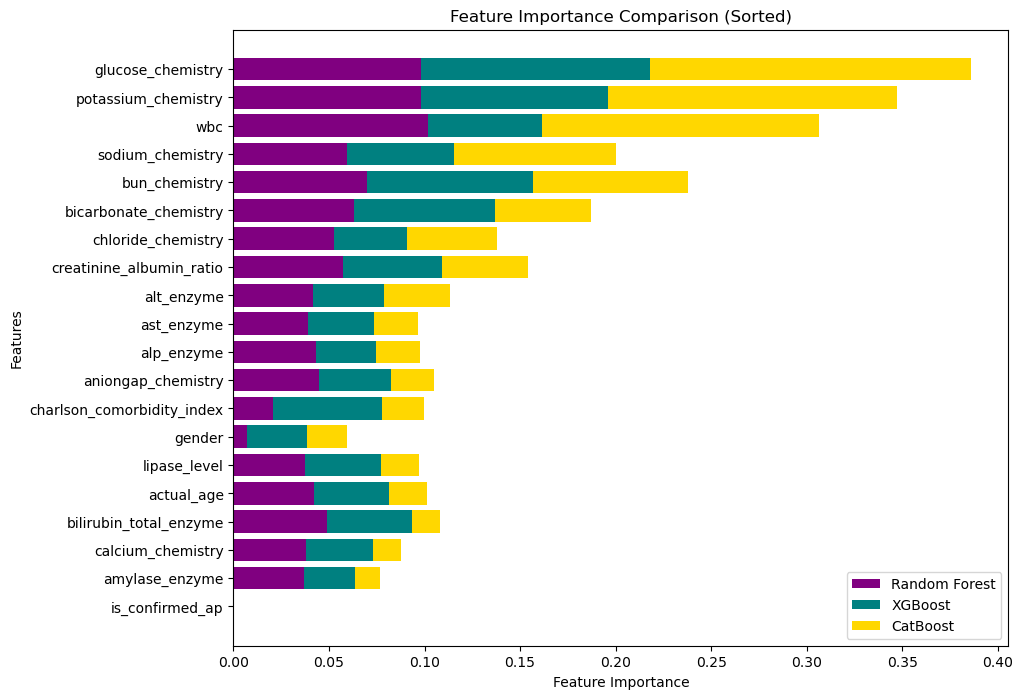

In [49]:
plt.figure(figsize=(10, 8))
plt.barh(feature_importances["feature"], feature_importances["importance_rf"], color="purple", label="Random Forest")
plt.barh(feature_importances["feature"], feature_importances["importance_xg"], color="teal", left=feature_importances["importance_rf"], label="XGBoost")
plt.barh(feature_importances["feature"], feature_importances["importance_cat"], color="gold", left=feature_importances["importance_rf"] + feature_importances["importance_xg"], label="CatBoost")

plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Comparison (Sorted)")
plt.legend(loc="lower right")
plt.gca().invert_yaxis()
plt.show()

In [225]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Convert target variable to one-hot encoded format
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Build a DNN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  
model.add(Dense(32, activation='relu'))                             
model.add(Dense(16, activation='relu'))                                                         
model.add(Dense(len(np.unique(y_train)), activation='softmax'))      

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=100, batch_size=10, validation_split=0.2)

# Make predictions
y_pred_dnn = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_dnn, axis=1)

# Calculate accuracy and display the classification report
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_classes))


Epoch 1/100


c:\Users\Nan\anaconda3\envs\nansang\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3392 - loss: 42.9899 - val_accuracy: 0.3841 - val_loss: 8.9687
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4019 - loss: 7.0741 - val_accuracy: 0.3902 - val_loss: 14.2006
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3978 - loss: 9.8578 - val_accuracy: 0.5061 - val_loss: 7.5639
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4679 - loss: 6.2862 - val_accuracy: 0.4024 - val_loss: 6.0194
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4481 - loss: 5.3033 - val_accuracy: 0.4268 - val_loss: 4.6731
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4892 - loss: 4.4786 - val_accuracy: 0.5549 - val_loss: 6.3906
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4720 - loss: 3.9782 - val_accuracy: 0.5305 - val_loss: 2.5883
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5392 - loss: 4.4299 - val_accuracy: 0.4756 - val_loss: 4

c:\Users\Nan\anaconda3\envs\nansang\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nan\anaconda3\envs\nansang\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nan\anaconda3\envs\nansang\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [226]:

y_pred_proba_rf = rf_model.predict_proba(X_test)


y_pred_proba_xgboost = xgb_model.predict_proba(X_test)


y_pred_proba_knn = knn_model.predict_proba(X_test)


y_pred_proba_log = logiest_model.predict_proba(X_test)


y_pred_proba_dnn = model.predict(X_test)  

y_pred_proba_catboost = cat_model.predict_proba(X_test)


c:\Users\Nan\anaconda3\envs\nansang\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Random Forest AUC: 0.54
XGBoost AUC: 0.54
K-Neighbors AUC: 0.66
Logistic Regression AUC: 0.73
DNN AUC: 0.75
CatBoost AUC: 0.84


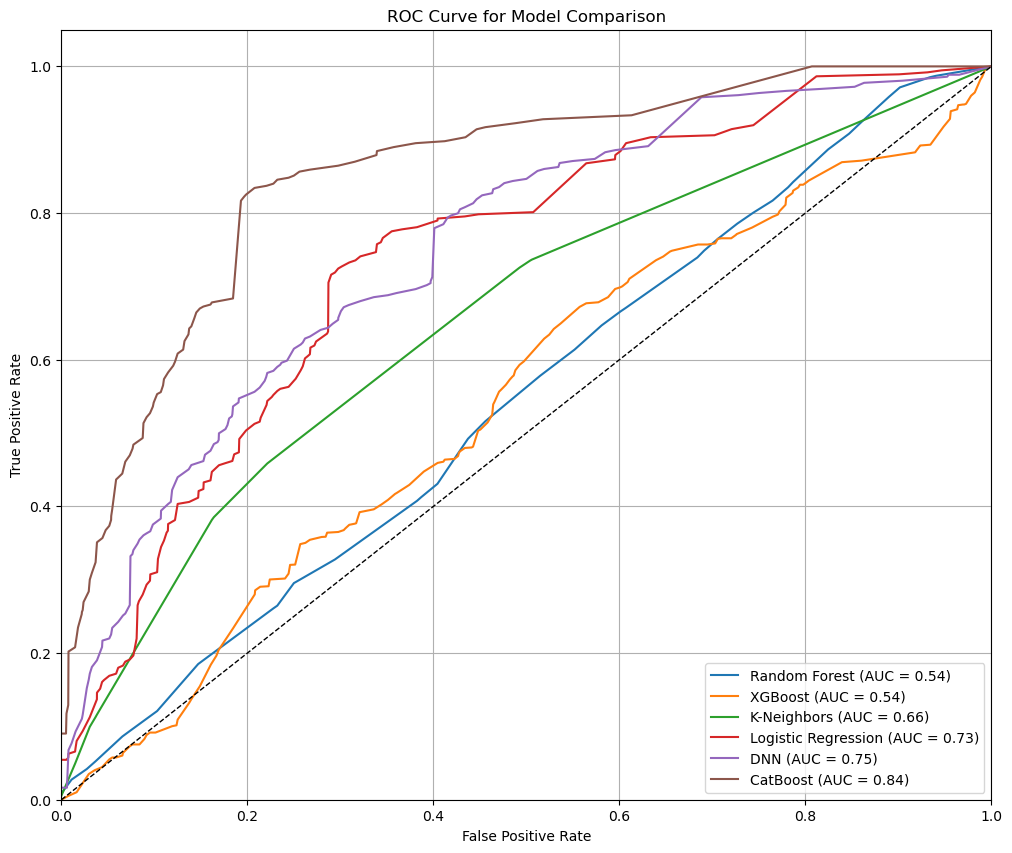

In [227]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assume each model's multi-class prediction probabilities as follows
# y_pred_proba_rf, y_pred_proba_xg, y_pred_proba_knn, y_pred_proba_log, y_pred_proba_dnn, y_pred_proba_cat
# Assume y_test is the original test set labels, not one-hot encoded

# Binarize the output labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # One-hot encode y_test for multi-class

# Dictionary of prediction probabilities for each model
predictions = {
    "Random Forest": y_pred_proba_rf,        # Random Forest prediction probabilities
    "XGBoost": y_pred_proba_xgboost,         # XGBoost prediction probabilities
    "K-Neighbors": y_pred_proba_knn,         # K-Neighbors prediction probabilities
    "Logistic Regression": y_pred_proba_log, # Logistic Regression prediction probabilities
    "DNN": y_pred_proba_dnn,                 # DNN prediction probabilities
    "CatBoost": y_pred_proba_catboost        # CatBoost prediction probabilities
}

# Plot multi-class ROC curve
plt.figure(figsize=(12, 10))

for model_name, y_pred_proba in predictions.items():
    # Calculate AUC score (macro average)
    roc_auc = roc_auc_score(y_test_bin, y_pred_proba, average="macro", multi_class="ovr")
    print(f'{model_name} AUC: {roc_auc:.2f}')
    # Calculate FPR and TPR for each class using one-vs-rest (OvR) approach
    fpr = {}
    tpr = {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])

    # Compute the mean ROC curve by interpolating each class curve
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_bin.shape[1])]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(y_test_bin.shape[1]):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= y_test_bin.shape[1]

    # Plot the mean ROC curve for each model
    plt.plot(all_fpr, mean_tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', linestyle='-', linewidth=1.5)

# Add diagonal baseline for random guessing
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model Comparison')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


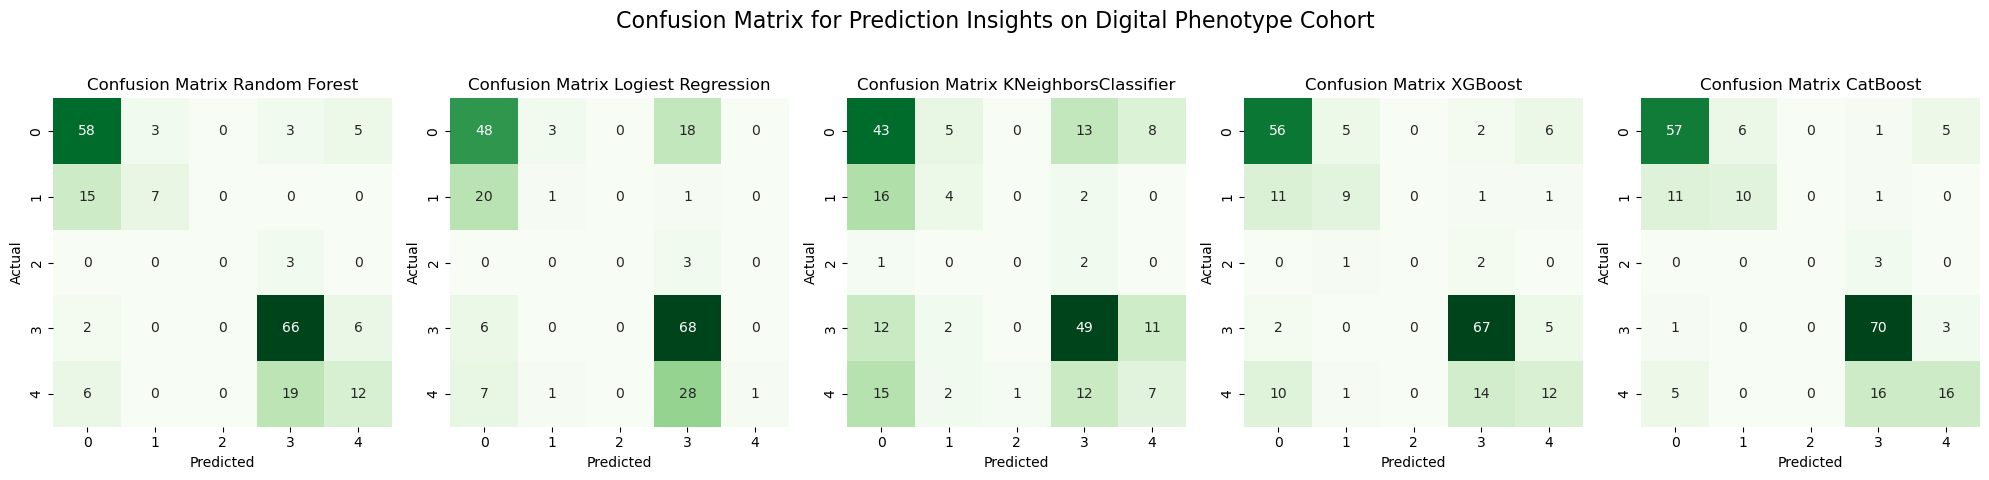

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_preds = {
    'Random Forest': y_pred_rf,
    'Logiest Regression': y_pred_logistic,
    'KNeighborsClassifier': y_pred_keighbors,
    'XGBoost': y_pred_xgboost,
    'CatBoost': y_pred_catboost,
    'DNN': y_pred_dnn
}


fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Confusion Matrix for Prediction Insights on Digital Phenotype Cohort', fontsize=16)


for ax, (model_name, y_pred) in zip(axes, y_preds.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
